In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("../data/processed_data/CREMP_OCTO_Summaries_2023_Density.csv")

C:\Users\Elite\AppData\Local\Temp\ipykernel_25220\2222779324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Species', y='Density', data=species_density, palette='viridis')


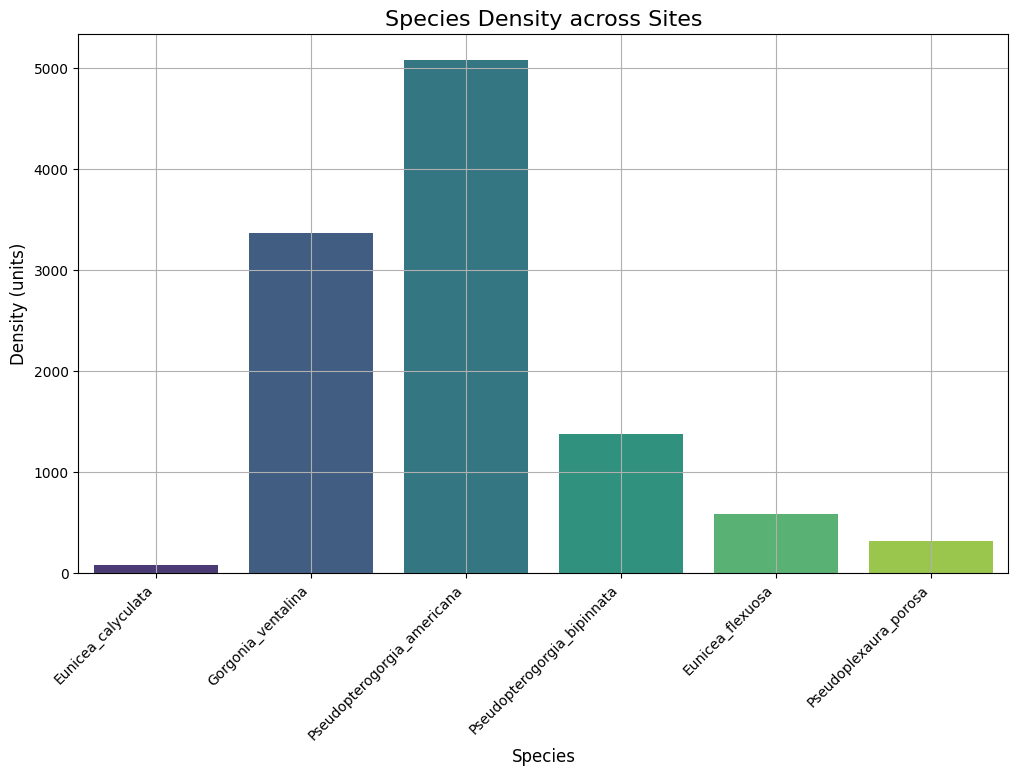

In [2]:
# 1. Species Density Distribution across Sites (Bar Plot)
species_columns = ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana', 
                   'Pseudopterogorgia_bipinnata', 'Eunicea_flexuosa', 'Pseudoplexaura_porosa']

# Sum the density of each species by site
species_density = data[species_columns].sum().reset_index(name='Density')
species_density.columns = ['Species', 'Density']

plt.figure(figsize=(12, 7))
sns.barplot(x='Species', y='Density', data=species_density, palette='viridis')
plt.title('Species Density across Sites', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Density (units)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.savefig("../plots/octocoral_species_density.png")
plt.show()
plt.close()

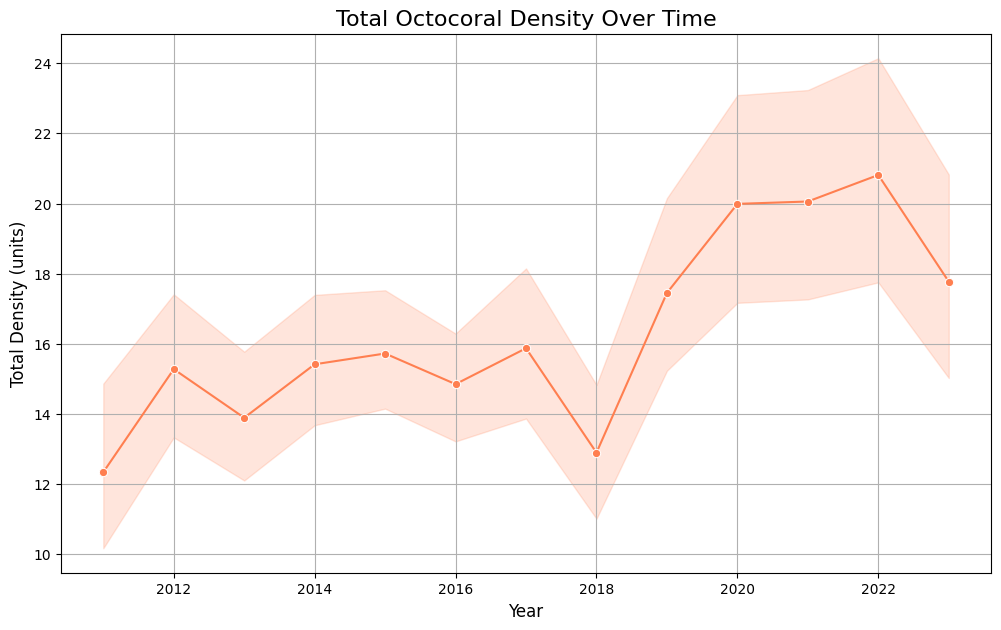

In [3]:
# 2. Total Octocoral Density Over Time (Line Plot)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Plot the total density over time
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Total_Octocorals', data=data, marker='o', color='coral')
plt.title('Total Octocoral Density Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Density (units)', fontsize=12)
plt.grid(True)
plt.savefig("../plots/octocoral_density_over_time.png")
plt.show()
plt.close()

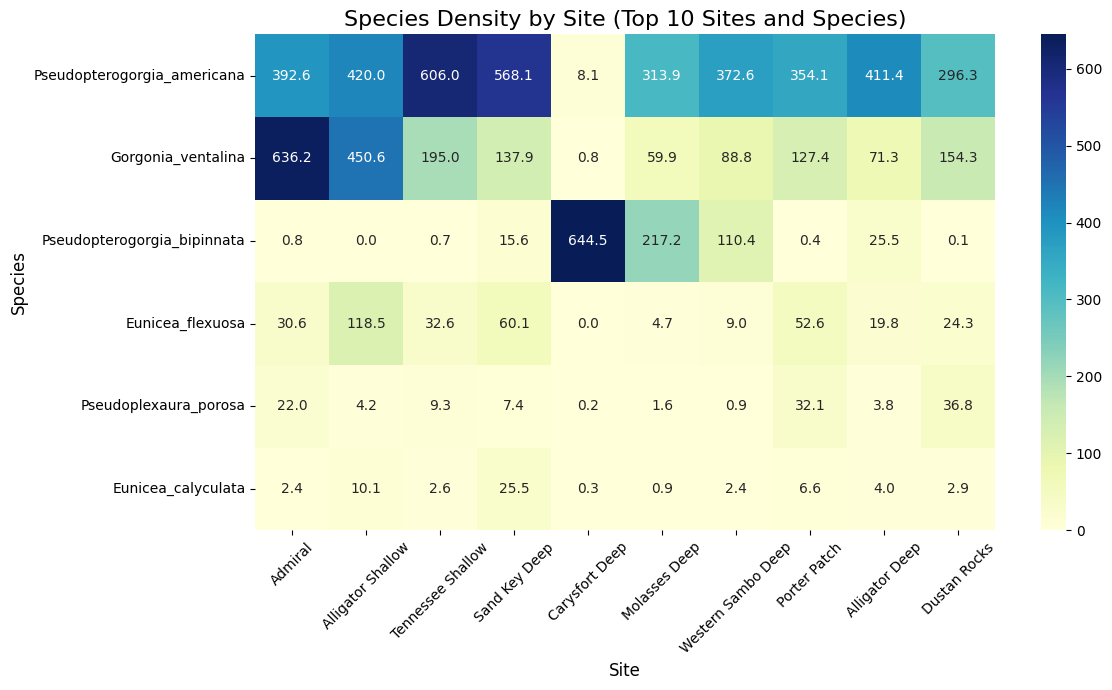

In [ ]:
# 3. Species Density by Site (Heatmap)
# Define species columns
non_species_cols = ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name',
                    'StationID', 'Total_Octocorals', 'row_index']
species_columns = [col for col in data.columns if col not in non_species_cols]

# Group by site and sum species densities
species_density_by_site = data[species_columns + ['Site_name']].groupby('Site_name').sum()

# Optional: Keep top N sites or species by total density
top_n_sites = species_density_by_site.sum(axis=1).nlargest(10).index  # top 10 sites
top_n_species = species_density_by_site.sum(axis=0).nlargest(10).index  # top 10 species

filtered_data = species_density_by_site.loc[top_n_sites, top_n_species]

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(filtered_data.T, annot=True, cmap='YlGnBu', cbar=True, fmt=".1f")
plt.title('Species Density by Site (Top 10 Sites and Species)', fontsize=16)
plt.xlabel('Site', fontsize=12)
plt.ylabel('Species', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../plots/species_density_by_site.png", dpi=300)
plt.show()
plt.close()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25220\4067450235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Site_name', y='Total_Octocorals', data=site_density, palette='magma')


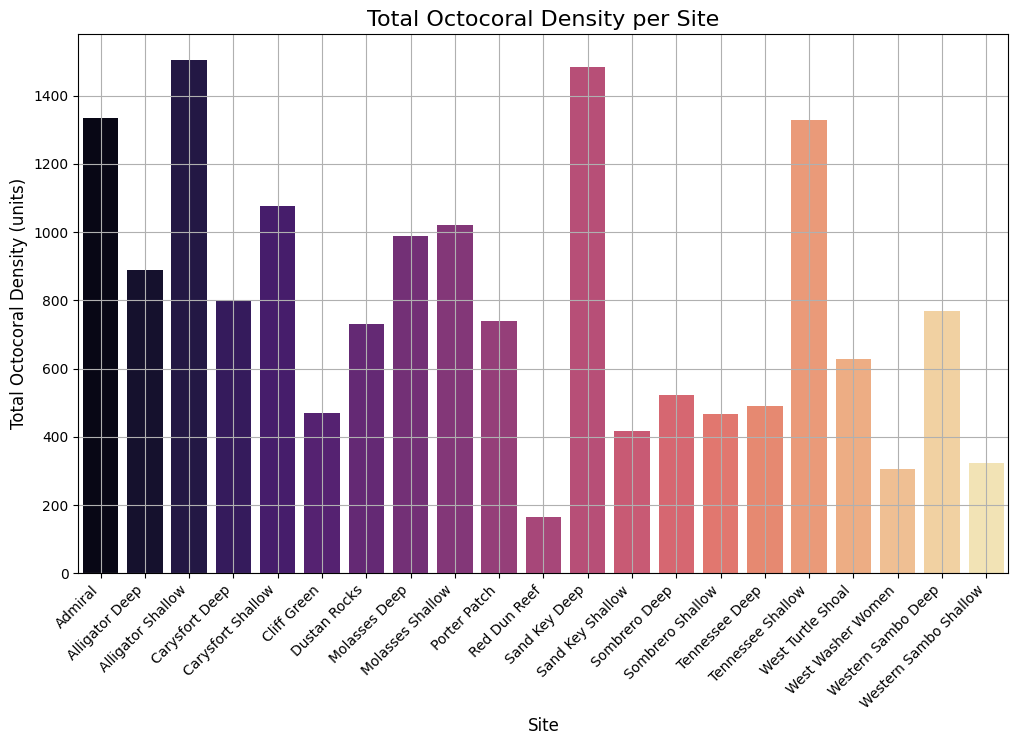

In [5]:
# 4. Total Octocoral Density per Site (Bar Plot)
site_density = data[['Site_name', 'Total_Octocorals']].groupby('Site_name').sum().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Site_name', y='Total_Octocorals', data=site_density, palette='magma')
plt.title('Total Octocoral Density per Site', fontsize=16)
plt.xlabel('Site', fontsize=12)
plt.ylabel('Total Octocoral Density (units)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.savefig("../plots/octocoral_total_density.png")
plt.show()
plt.close()